In [1]:
import numpy as np
from scipy import integrate, interpolate
import matplotlib.pyplot as plt

In [115]:
alpha = 0.5
beta = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t0, tf = 0, 25

t = np.linspace(t0, tf, 100)

In [116]:
def dsdt(t, s):
    return -alpha * s

In [117]:
solve1 = integrate.solve_ivp(dsdt, [t0, tf], [S])

In [121]:
t1, y1 = solve1.t, solve1.y[0]

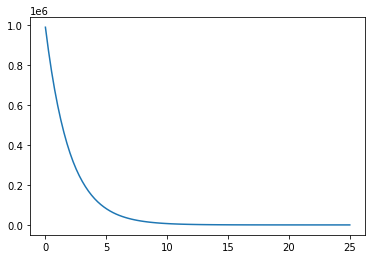

In [125]:
st = interpolate.interp1d(t1, y1, kind='cubic')
plt.plot(t, st(t))

In [126]:
def didt(t, i):
    return alpha * st(t) - beta * i

In [127]:
solve2 = integrate.solve_ivp(didt, [t0, tf], np.array([I]))

In [129]:
t2, y2 = solve2.t, solve2.y[0]

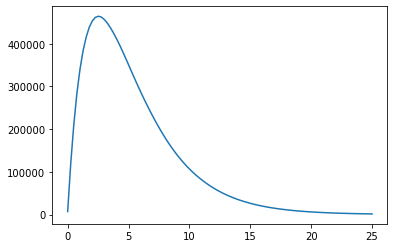

In [132]:
it = interpolate.interp1d(t2, y2, kind='cubic')
plt.plot(t, it(t))

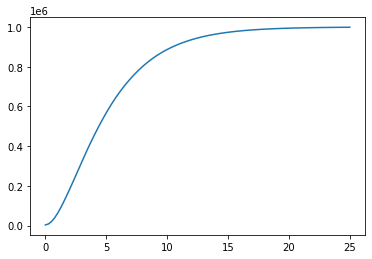

In [133]:
y3 = N - st(t) - it(t)
plt.plot(t, y3)

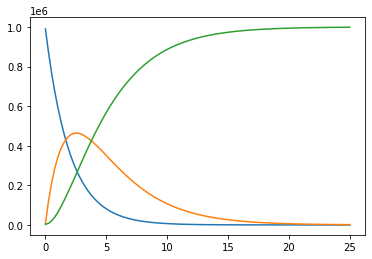

In [134]:
plt.plot(t, st(t), t, it(t), t, y3)
plt.show()